In [141]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [143]:
sns.set()

In [2]:
os.chdir('C:\\Users\\Janice\\Downloads')

In [3]:
df = pd.read_csv('bitfinex_btcusd.csv')

In [4]:
df.head()


,Unnamed: 0,time,open,close,high,low,volume,id_date
0,60,2021-03-15 00:00:00+08:00,59660.000000,59661.0,59780.000000,59660.000000,32.118424,20210315
1,59,2021-03-15 00:01:00+08:00,59651.135563,59570.0,59651.426845,59561.000000,0.958954,20210315
2,58,2021-03-15 00:02:00+08:00,59571.000000,59526.0,59571.000000,59512.889231,1.316127,20210315
3,57,2021-03-15 00:03:00+08:00,59519.334925,59319.0,59519.334925,59319.000000,23.441715,20210315
4,56,2021-03-15 00:04:00+08:00,59399.000000,59400.0,59400.000000,59270.000000,17.212419,20210315


In [8]:
df.dtypes

Unnamed: 0                                    int64
time          datetime64[ns, pytz.FixedOffset(480)]
open                                        float64
close                                       float64
high                                        float64
low                                         float64
volume                                      float64
id_date                                       int64
dtype: object

In [7]:
df['time'] = pd.to_datetime(df['time'])

In [9]:
df.index = df['time']

In [17]:
df2 = df[['close']]

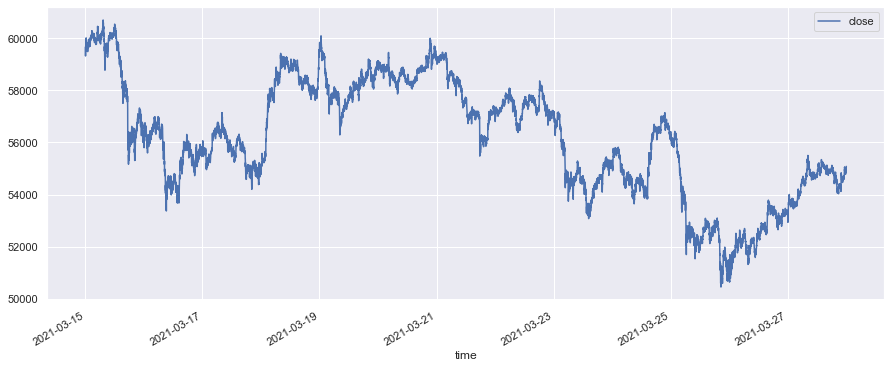

In [144]:
df2.plot( figsize = (15,6))
plt.show()

In [59]:
df3 = df2.loc['20210318':]

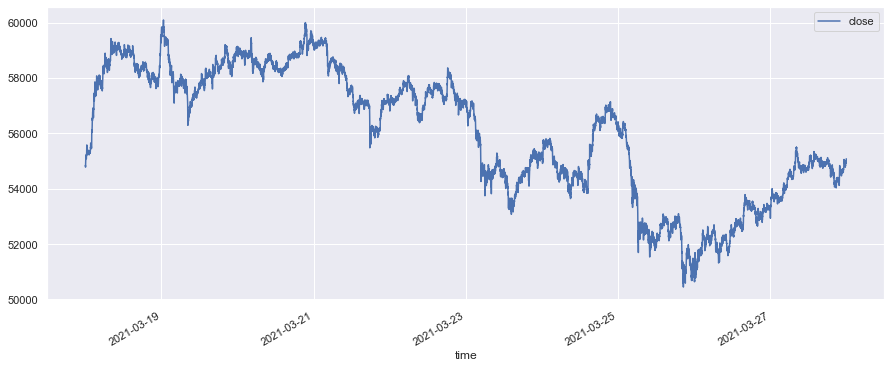

In [145]:
df3.plot(figsize = (15,6))
plt.show()

In [78]:
df3.shape

(14390, 1)

## look at S&P price and explore any similar trends

In [61]:
sp500 = pd.read_csv('s&p500.csv')

In [62]:
sp500['Date'] = pd.to_datetime(sp500['Date'])

In [63]:
sp500.index = sp500['Date']

In [64]:
sp500.head

<bound method NDFrame.head of                  Date     Open     High      Low   Close*  Adj. close**  \
Date                                                                      
2021-03-18 2021-03-18  3953.50  3969.62  3910.86  3915.46       3915.46   
2021-03-19 2021-03-19  3913.14  3930.12  3886.75  3913.10       3913.10   
2021-03-22 2021-03-22  3916.48  3955.31  3914.16  3940.59       3940.59   
2021-03-23 2021-03-23  3937.60  3949.13  3901.57  3910.52       3910.52   
2021-03-24 2021-03-24  3919.93  3942.08  3889.07  3889.14       3889.14   
2021-03-25 2021-03-25  3879.34  3919.54  3853.50  3909.52       3909.52   
2021-03-26 2021-03-26  3917.12  3978.19  3917.12  3974.54       3974.54   
2021-03-29 2021-03-29  3969.31  3981.83  3943.25  3971.09       3971.09   
2021-03-30 2021-03-30  3963.34  3968.01  3944.35  3958.55       3958.55   
2021-03-31 2021-03-31  3967.25  3994.41  3966.98  3972.89       3972.89   

                  Volume  
Date                      
2021-03-18  4.0

In [87]:
sp500['SP500_Close'] = sp500['Close*']

In [88]:
sp500['SP500_Close'] = pd.to_numeric(sp500['SP500_Close'])

In [89]:
sp500_2 = sp500.loc['20210318':'20210328']
sp500_2 = sp500_2['SP500_Close']

In [90]:
sp500_2

Date
2021-03-18    3915.46
2021-03-19    3913.10
2021-03-22    3940.59
2021-03-23    3910.52
2021-03-24    3889.14
2021-03-25    3909.52
2021-03-26    3974.54
Name: SP500_Close, dtype: float64

In [123]:
df_merged = pd.merge(df3, sp500_2, how = 'left', left_on = df3.index.day, right_on = sp500_2.index.day).set_index(df3.index)

In [124]:
df_merged['Bitcoin_Close'] = df_merged['close']

In [125]:
df_merged = df_merged.drop('close',axis = 1)

In [126]:
df_merged

,key_0,SP500_Close,Bitcoin_Close
time,,,
2021-03-18 00:00:00+08:00,18,3915.46,54838.000000
2021-03-18 00:01:00+08:00,18,3915.46,54840.000000
2021-03-18 00:02:00+08:00,18,3915.46,54841.000000
2021-03-18 00:03:00+08:00,18,3915.46,54779.011171
2021-03-18 00:04:00+08:00,18,3915.46,54880.000000
...,...,...,...
2021-03-27 23:56:00+08:00,27,NaN,54993.000000
2021-03-27 23:57:00+08:00,27,NaN,55003.000000
2021-03-27 23:58:00+08:00,27,NaN,54927.000000


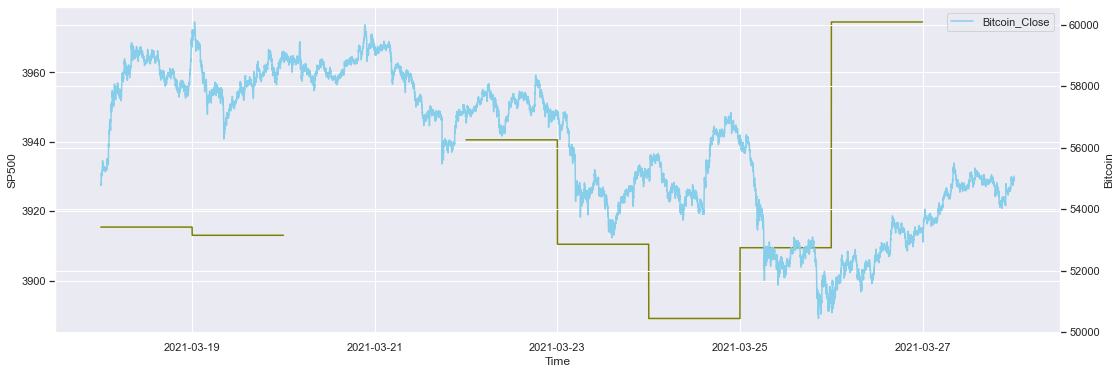

In [149]:
fig, ax = plt.subplots(figsize = (18,6))


ax.plot(df_merged.index, 'SP500_Close', data=df_merged, color = 'olive')
ax.set_xlabel('Time')
ax.set_ylabel('SP500')


ax2 = ax.twinx()
ax2.plot(df_merged.index, 'Bitcoin_Close',data=df_merged,color='skyblue')
ax2.set_ylabel('Bitcoin')

plt.legend()
#plt.figsize(16,8)
plt.show()


<AxesSubplot:xlabel='time'>

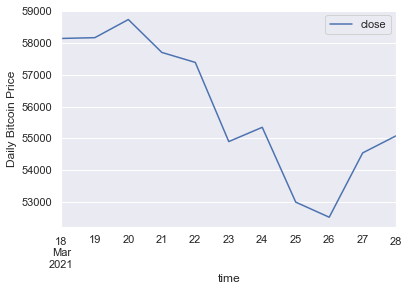

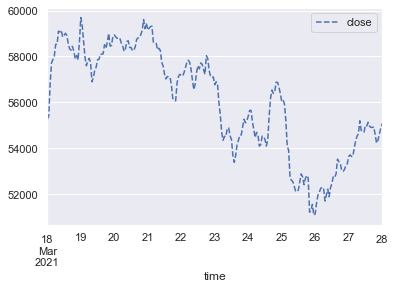

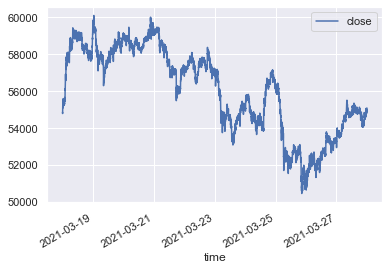

In [159]:
weekly = df3.resample('D').mean()
weekly.plot(style=[ '-'])
plt.ylabel('Daily Bitcoin Price');

hourly = df3.resample('H').mean()
hourly.plot(style=['--'])
df3.plot()


In [185]:
df3_hourly = df3.resample('H').mean()

In [195]:
df3_hourly

,close,hourly,lag1,variance
time,,,,
2021-03-18 00:00:00+08:00,55263.998230,3.315840e+06,NaN,NaN
2021-03-18 01:00:00+08:00,55394.955471,3.323697e+06,55263.998230,-130.957241
2021-03-18 02:00:00+08:00,56785.858055,3.407151e+06,55394.955471,-1390.902584
2021-03-18 03:00:00+08:00,57717.216412,3.463033e+06,56785.858055,-931.358356
2021-03-18 04:00:00+08:00,57870.978114,3.472259e+06,57717.216412,-153.761703
...,...,...,...,...
2021-03-27 20:00:00+08:00,54222.030370,3.253322e+06,54602.512253,380.481883
2021-03-27 21:00:00+08:00,54352.530754,3.261152e+06,54222.030370,-130.500384
2021-03-27 22:00:00+08:00,54608.465087,3.276508e+06,54352.530754,-255.934333


In [188]:
df3_hourly['lag1'] = df3_hourly['close'].shift(1)

In [197]:
df3_hourly['variance'] =  df3_hourly['close'] - df3_hourly['lag1']


<AxesSubplot:>

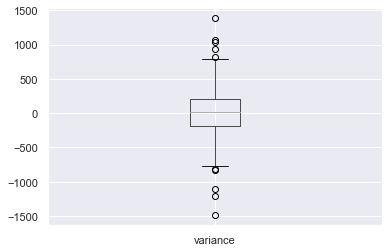

In [198]:
df3_hourly.boxplot('variance')

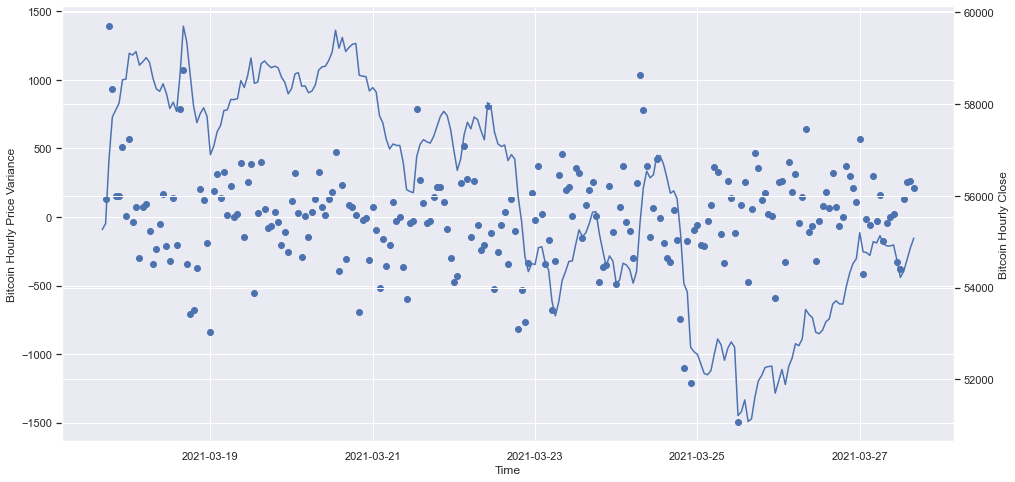

In [217]:
fig, ax = plt.subplots(figsize=(16,8))
ax.scatter(df3_hourly.index, df3_hourly['variance'] )

ax.set_xlabel('Time')
ax.set_ylabel('Bitcoin Hourly Price Variance')


ax2 = ax.twinx()
ax2.plot(df3_hourly.close)
ax2.set_ylabel('Bitcoin Hourly Close')

plt.show()

In [214]:
df3_hourly[abs(df3_hourly['variance'])>1000]

,close,hourly,lag1,variance
time,,,,
2021-03-18 02:00:00+08:00,56785.858055,3.407151e+06,55394.955471,1390.902584
2021-03-19 00:00:00+08:00,59697.441037,3.581846e+06,58624.688785,1072.752252
2021-03-24 15:00:00+08:00,55384.232176,3.323054e+06,54345.775738,1038.456438
2021-03-25 04:00:00+08:00,54084.604613,3.245076e+06,55188.837233,-1104.232620
2021-03-25 06:00:00+08:00,52698.711125,3.161923e+06,53908.062263,-1209.351138
2021-03-25 20:00:00+08:00,51209.905907,3.072594e+06,52701.395888,-1491.489981


### Some research on bitcoin news

Bitcoin, the world’s largest cryptocurrency, gained nearly 6% in the last 24 hours and registered a high of $59,320 on 18 March. https://www.financemagnates.com/cryptocurrency/news/bitcoin-owner-moves-5000-btc-from-binance-to-xapo/




In [218]:
df3_hourly[abs(df3_hourly['variance'])>800]

,close,hourly,lag1,variance
time,,,,
2021-03-18 02:00:00+08:00,56785.858055,3.407151e+06,55394.955471,1390.902584
2021-03-18 03:00:00+08:00,57717.216412,3.463033e+06,56785.858055,931.358356
2021-03-19 00:00:00+08:00,59697.441037,3.581846e+06,58624.688785,1072.752252
2021-03-19 08:00:00+08:00,56895.693986,3.413742e+06,57731.655840,-835.961854
2021-03-22 18:00:00+08:00,58032.420273,3.481945e+06,57219.980665,812.439608
2021-03-23 03:00:00+08:00,55981.185072,3.358871e+06,56798.378116,-817.193044
2021-03-24 15:00:00+08:00,55384.232176,3.323054e+06,54345.775738,1038.456438
2021-03-25 04:00:00+08:00,54084.604613,3.245076e+06,55188.837233,-1104.232620
2021-03-25 06:00:00+08:00,52698.711125,3.161923e+06,53908.062263,-1209.351138
